# Implementing SVM

In [3]:
import numpy as np
import pandas as pd
df=pd.read_csv('abalone.data',header=None)

In [4]:
df.columns=['Sex','Length','Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight','Rings']
print(df.head())
print(df.describe())
print(df.shape)
print(df.dtypes)

  Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  
            Length     Diameter       Height  Whole_weight  Shucked_weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0

In [5]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [16]:
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
29      1
26      1
2       1
25      1
Name: count, dtype: int64

In [2]:
df['Rings'].hist(bins=30)

NameError: name 'df' is not defined

# Implementing Otliners

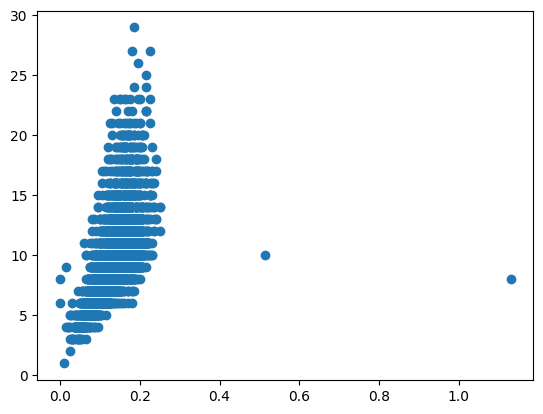

In [18]:
import matplotlib.pyplot as plt
plt.scatter(df['Height'],df['Rings'])
plt.show()

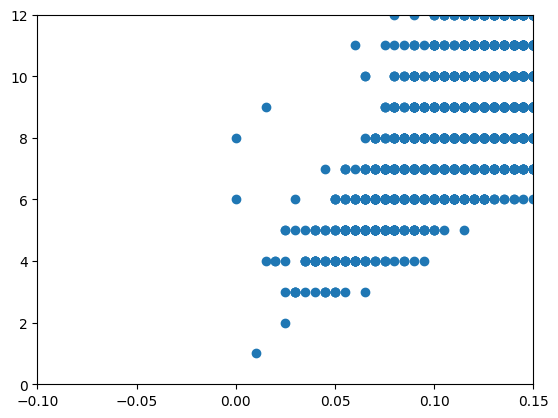

In [19]:
plt.xlim(-0.1,0.15)
plt.ylim(0,12)
plt.scatter(df['Height'],df['Rings'])
plt.show()

In [20]:
df[df['Height']==0]
df[df['Height']>0.4]
print('Shape before dropping outliers',df.shape)

Shape before dropping outliers (4177, 9)


In [21]:
df.drop(index=[1257,3996,1417,2051],inplace=True)
print('Shape after dropping outliers',df.shape)

Shape after dropping outliers (4173, 9)


In [22]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df_encoded=pd.DataFrame()

In [24]:
df['Sex'].replace(['M','F','I'],[0,1,2],inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25288\934159920.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sex'].replace(['M','F','I'],[0,1,2],inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_25288\934159920.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'].replace(['M','

In [25]:
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [27]:
df.corr()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Sex,1.000000,-0.448156,-0.457655,-0.451387,-0.460626,-0.440336,-0.454032,-0.445524,-0.351541
Length,-0.448156,1.000000,0.986794,0.900868,0.925328,0.898129,0.903033,0.898363,0.556572
Diameter,-0.457655,0.986794,1.000000,0.907187,0.925499,0.893330,0.899716,0.906026,0.574551
Height,-0.451387,0.900868,0.907187,1.000000,0.888850,0.837485,0.866757,0.891857,0.610107
Whole_weight,-0.460626,0.925328,0.925499,0.888850,1.000000,0.969370,0.966290,0.955954,0.540621
Shucked_weight,-0.440336,0.898129,0.893330,0.837485,0.969370,1.000000,0.931831,0.883194,0.421156
Viscera_weight,-0.454032,0.903033,0.899716,0.866757,0.966290,0.931831,1.000000,0.908133,0.503977
Shell_weight,-0.445524,0.898363,0.906026,0.891857,0.955954,0.883194,0.908133,1.000000,0.628169
Rings,-0.351541,0.556572,0.574551,0.610107,0.540621,0.421156,0.503977,0.628169,1.000000


In [28]:
df.corr()['Rings']

Sex              -0.351541
Length            0.556572
Diameter          0.574551
Height            0.610107
Whole_weight      0.540621
Shucked_weight    0.421156
Viscera_weight    0.503977
Shell_weight      0.628169
Rings             1.000000
Name: Rings, dtype: float64

In [29]:
X=df.drop(['Rings'],axis=1)
y=df['Rings']

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [37]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3129, 8)
(1044, 8)
(3129,)
(1044,)


In [40]:
from sklearn.svm import SVC
model1=SVC(kernel='poly',degree=2,gamma=1,class_weight='balanced',C=2)

In [41]:
model1.fit(X_train,y_train)
print('Accuracy of model1=',model1.score(X_test,y_test))

Accuracy of model1= 0.21839080459770116


In [42]:
model2=SVC(kernel='rbf',gamma=5,class_weight='balanced',C=2)
model2.fit(X_train,y_train)
print('Accuracy of model2=',model2.score(X_test,y_test))

Accuracy of model2= 0.2049808429118774


In [44]:
params={'kernel':['vbf','poly','sigmoid'],'C':[0.01,0.1,1.5],'degree':[2,3,4],'gamma':[0.1,1,10]}

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

SVM_grid = GridSearchCV(SVC(), params, cv=5)

In [ ]:
SVM_grid.fit(X_train,y_train)
print(SVM_grid.best_score_,SVM_grid.best_params_)
best_mode=SVM_grid.best_estimator_
print("Accuracy of the best model",best_model.score(X_test,y_test))

C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
